<a href="https://colab.research.google.com/github/geo-tp/Keras-Colaboratory-Models/blob/main/data_augmentation_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DATA AUGMENTATION

1.IMAGE AUGMENTATION

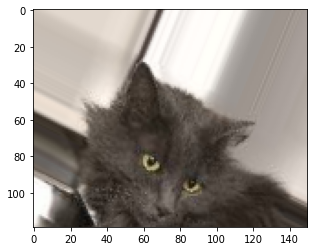

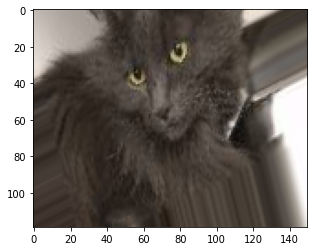

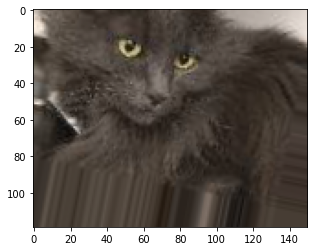

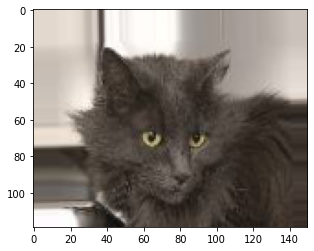

In [ ]:
from keras.preprocessing import image
from keras import utils
import matplotlib.pyplot as plt
from sys import path

base_dir = path[0]+ "/"

# Initialise data generator with augmentation features
train_datagen = image.ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
)

# Load a sample img (import it into lab)
img = utils.load_img(base_dir + "38.jpg")

x = utils.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0

# Show image transformation
for batch in train_datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(utils.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break

plt.show()

In [ ]:
# Final train data generator from directory to use with model.fit()
train_generator = train_datagen.flow_from_directory(
    "/dir/example/", target_size=(150, 150), batch_size=32, class_mode="binary"
)